In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
df = pd.read_csv('master_table.csv')

In [3]:
# df.info()

In [4]:
# sns.pairplot(df)

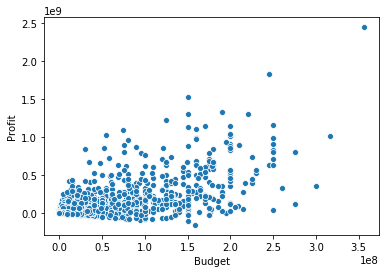

In [5]:
sns.scatterplot(x=df['Budget'], y=df['Profit'])

In [6]:
df.describe()

,Budget,Opening Weekend USA,Gross USA,Cumulative Worldwide Gross,start_year,runtime_minutes,averagerating,numvotes,Profit,Comedy,...,Romance,Fantasy,Family,Drama,War,Animation,Western,Mystery,Crime,Sci-Fi
count,1.717200e+04,1.717200e+04,1.717200e+04,1.717200e+04,17172.000000,15986.000000,16507.000000,1.650700e+04,1.717200e+04,17172.000000,...,17172.000000,17172.000000,17172.000000,17172.000000,17172.000000,17172.00000,17172.000000,17172.000000,17172.000000,17172.000000
mean,5.493568e+06,1.762917e+06,5.837795e+06,1.794257e+07,2014.103541,102.095271,6.143672,1.410334e+04,1.007867e+07,0.324016,...,0.125204,0.036862,0.052469,0.488062,0.014966,0.04816,0.003436,0.045656,0.088050,0.034475
std,2.173181e+07,1.053529e+07,3.272471e+07,8.934955e+07,2.723402,20.342989,1.155549,6.188770e+04,7.218999e+07,0.468020,...,0.330960,0.188429,0.222978,0.499872,0.121421,0.21411,0.058517,0.208743,0.283376,0.182450
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2010.000000,15.000000,1.100000,5.000000e+00,-1.580311e+08,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,3.601025e+04,2012.000000,90.000000,5.500000,1.220000e+02,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,0.000000e+00,0.000000e+00,3.653050e+05,2014.000000,98.000000,6.300000,5.220000e+02,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,8.000000e+05,3.412250e+03,1.710475e+04,3.323890e+06,2016.000000,110.000000,6.900000,2.940000e+03,0.000000e+00,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.560000e+08,3.571150e+08,9.366622e+08,2.797801e+09,2020.000000,808.000000,9.800000,1.841066e+06,2.441801e+09,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


# Adding RoI Column

In [7]:
df = df.drop(df[df.Budget < 1000].index)

In [8]:
df['Roi'] = ((df['Cumulative Worldwide Gross'] - df['Budget'])/df['Budget'])*100

In [9]:
df['Roi'] = df['Roi'].replace(np.inf, np.nan)

In [10]:
# number of films per genre in our df, excludes the Roi column we added afterward
df.iloc[:,-22:-1].sum().sort_index() 

Action         1072.0
Adventure       737.0
Animation       292.0
Biography       367.0
Comedy         1739.0
Crime           648.0
Documentary     318.0
Drama          2739.0
Family          320.0
Fantasy         297.0
History         247.0
Horror          494.0
Music           137.0
Musical          50.0
Mystery         321.0
Romance         651.0
Sci-Fi          264.0
Sport            97.0
Thriller        805.0
War             117.0
Western          28.0
dtype: float64

In [64]:
df.loc[df['Animation'] == 1.0].sort_values(['Roi'], ascending=True).head(50)

,primary_title,Country,Budget,Opening Weekend USA,Gross USA,Cumulative Worldwide Gross,start_year,runtime_minutes,genres,averagerating,...,Fantasy,Family,Drama,War,Animation,Western,Mystery,Crime,Sci-Fi,Roi
10024,"Mummy, I'm A Zombie",Spain,2106000,NaN,120.0,120,2014,82.0,[Animation],4.9,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,-99.994302
7071,Hiroku: Defenders of Gaia,Spain,3510000,NaN,NaN,824,2013,80.0,"[Adventure, Animation, Sci-Fi]",7.4,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,-99.976524
2564,Last Prince of Atlantis,USA,7800000,NaN,NaN,4237,2018,84.0,"[Adventure, Animation, Family]",5.5,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,-99.945679
852,Mystikal,Spain,5850000,NaN,NaN,5817,2010,90.0,"[Adventure, Animation, Family]",3.5,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,-99.900564
10482,The Magic Mountain,Romania,1170000,NaN,NaN,1189,2015,85.0,"[Animation, Biography, Documentary]",6.9,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,-99.898376
14481,Strike,UK,16800000,1934.0,15758.0,24743,2018,100.0,"[Adventure, Animation, Comedy]",6.4,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,-99.852720
16069,Batman and Harley Quinn,USA,3500000,NaN,NaN,6448,2017,74.0,"[Action, Adventure, Animation]",5.9,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,-99.815771
2525,Foodfight!,USA,65000000,NaN,NaN,120141,2012,91.0,"[Action, Animation, Comedy]",1.9,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,-99.815168
15809,Historietas Assombradas: O Filme,Brazil,1500000,NaN,NaN,3012,2017,90.0,[Animation],6.8,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,-99.799200
4124,Silver Circle,USA,1600000,1314.0,4080.0,4080,2013,90.0,"[Animation, Thriller]",6.4,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,-99.745000


# Genres with the Highest Profit

In [12]:
df['genres'] = df['genres'].map(lambda x: ast.literal_eval(x))

In [13]:
list_of_genres = [row[0] for row in df['genres']]

In [14]:
l_o_genres = list(set(list_of_genres))

In [15]:
l_o_genres.remove('NaN')

In [16]:
l_o_genres = sorted(l_o_genres)

In [17]:
# df_action = df.loc[df['Action'] == 1.0]
avg_profit_per_genre = [df['Profit'].loc[df[genre]].mean().round(2) for genre in l_o_genres]

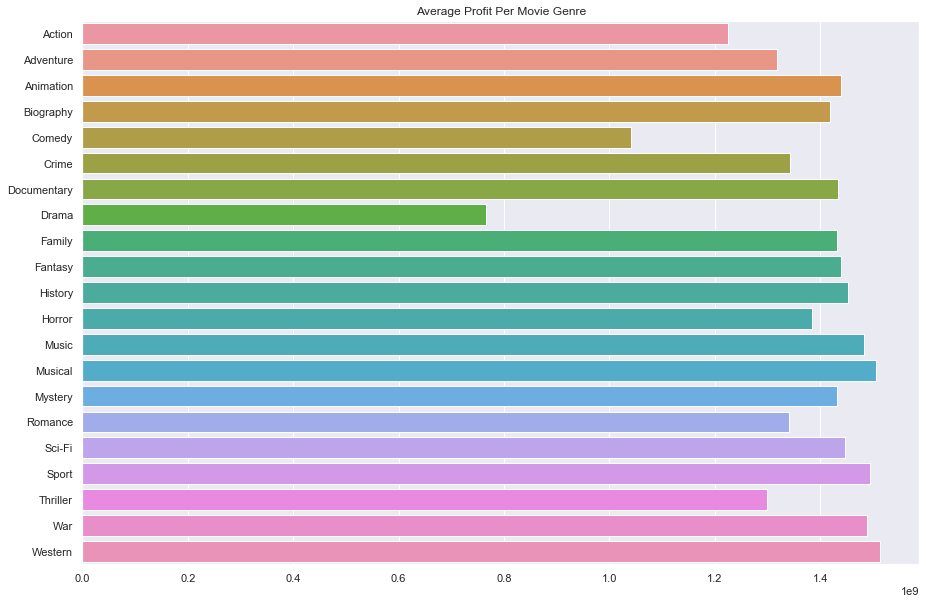

In [18]:
sns.set_context("poster")
sns.set(rc={'figure.figsize':(15,10)})
sns_plot = sns.barplot(x=avg_profit_per_genre, y=l_o_genres).set_title('Average Profit Per Movie Genre')
# sns_plot.savefig("avg_profit_per_genre.png")

In [19]:
# med_profit_per_genre = [df['Profit'].loc[df[genre]].median().round(2) for genre in l_o_genres]
# med_profit_per_genre

In [20]:
# sns.set(rc={'figure.figsize':(15,10)})
# sns_plot2 = sns.barplot(x=med_profit_per_genre, y=l_o_genres).set_title('Median Profit Per Movie Genre')
# # sns_plot2.set(ylim=(0, None))

# Movies Per Genre in our DataFrame

In [21]:
movies_per_genre = df.iloc[:,-22:-1].sum().sort_index()

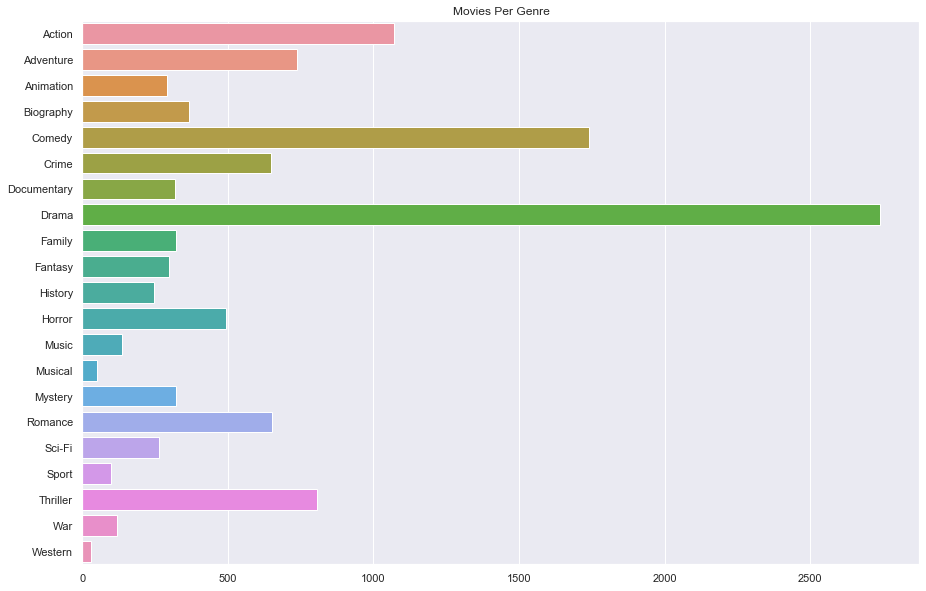

In [22]:
sns.set(rc={'figure.figsize':(15,10)})
sns_plot = sns.barplot(x=movies_per_genre, y=l_o_genres).set_title('Movies Per Genre')

# Replacing 0s with NaNs for Profit to Evaluate Outlying Data

In [23]:
df['Profit'] = df['Profit'].astype(float)
df = df.replace(0, np.nan)
df['Profit']

0        1.520401e+09
1        3.413910e+07
2        8.254678e+08
5        8.444960e+05
6        1.511448e+08
             ...     
17149    4.361834e+08
17157    1.310969e+06
17160   -8.757249e+06
17167   -5.550310e+05
17169   -1.385315e+06
Name: Profit, Length: 5397, dtype: float64

In [24]:
df.describe()

,Budget,Opening Weekend USA,Gross USA,Cumulative Worldwide Gross,start_year,runtime_minutes,averagerating,numvotes,Profit,Comedy,...,Fantasy,Family,Drama,War,Animation,Western,Mystery,Crime,Sci-Fi,Roi
count,5.397000e+03,2.429000e+03,2.518000e+03,5.397000e+03,5397.000000,5144.000000,5232.000000,5.232000e+03,5.396000e+03,1739.0,...,297.0,320.0,2739.0,117.0,292.0,28.0,321.0,648.0,264.0,5396.000000
mean,1.747925e+07,1.231710e+07,3.915482e+07,4.953678e+07,2013.869001,104.210925,6.132359,3.958337e+04,3.206347e+07,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,224.371599
std,3.596261e+07,2.557381e+07,7.744017e+07,1.533469e+08,2.688497,19.310576,1.143466,1.049323e+05,1.260216e+08,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3093.316432
min,1.000000e+03,1.100000e+01,7.400000e+01,1.300000e+01,2010.000000,40.000000,1.100000,5.000000e+00,-1.580311e+08,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-99.998700
25%,1.000000e+06,2.864900e+04,1.348290e+05,9.061100e+04,2012.000000,91.000000,5.500000,2.917500e+02,-2.559380e+06,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-92.732882
50%,4.000000e+06,1.088873e+06,6.723074e+06,1.385970e+06,2014.000000,100.000000,6.300000,2.207500e+03,-3.924515e+05,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-50.036097
75%,1.500000e+07,1.443727e+07,4.505949e+07,2.150081e+07,2016.000000,114.000000,6.900000,2.427525e+04,7.478249e+06,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,119.933361
max,3.560000e+08,3.571150e+08,9.366622e+08,2.797801e+09,2020.000000,321.000000,9.700000,1.841066e+06,2.441801e+09,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,131281.809524


In [25]:
q1 = df['Profit'].quantile(0.25)
q3 = df['Profit'].quantile(0.75)
print(q1)
print(q3)

-2559379.75
7478248.75


In [26]:
iqr = q3 - q1
outlier = iqr * 1.5
print(iqr)
print(outlier)

10037628.5
15056442.75


In [27]:
lower_bound = q1 - outlier
upper_bound = q3 + outlier
print(lower_bound)
print(upper_bound)

-17615822.5
22534691.5


# Removing Outlying Data Based on Profit

In [28]:
# avg_profit_per_genre = [df['Profit'].loc[df[genre]].mean().round(2) for genre in l_o_genres]
# movies_per_genre = df.iloc[:,-22:-1].sum().sort_index()
# df.iloc[:,-22:-1]
# ######
df_profit = df.loc[(df['Profit'] >= lower_bound) & (df['Profit'] <= upper_bound)]

In [29]:
df_profit['Profit'] = df_profit['Profit'].replace(np.nan, 0)

/Users/davidbruce/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


5          844496.0
10        -262801.0
13      -16446165.0
16         -19443.0
17      -15110489.0
            ...    
17137    -2339806.0
17157     1310969.0
17160    -8757249.0
17167     -555031.0
17169    -1385315.0
Name: Profit, Length: 4212, dtype: float64

In [30]:
avg_profit_per_genre_no_outliers = [df_profit['Profit'].iloc[num].mean() for num in list(range(-22,-1))]

[8649.0,
 14816139.0,
 -19787.0,
 -866547.0,
 -378906.0,
 -160982.0,
 -275568.0,
 -9405526.0,
 12746823.0,
 -1490532.0,
 -3112293.0,
 -3914063.0,
 2144008.0,
 -291073.0,
 -88538.0,
 6833259.0,
 -348123.0,
 -2339806.0,
 1310969.0,
 -8757249.0,
 -555031.0]

In [31]:
# avg_profit_per_genre_no_outliers = [df['Profit'].loc[df[genre]].mean() for genre in l_o_genres]

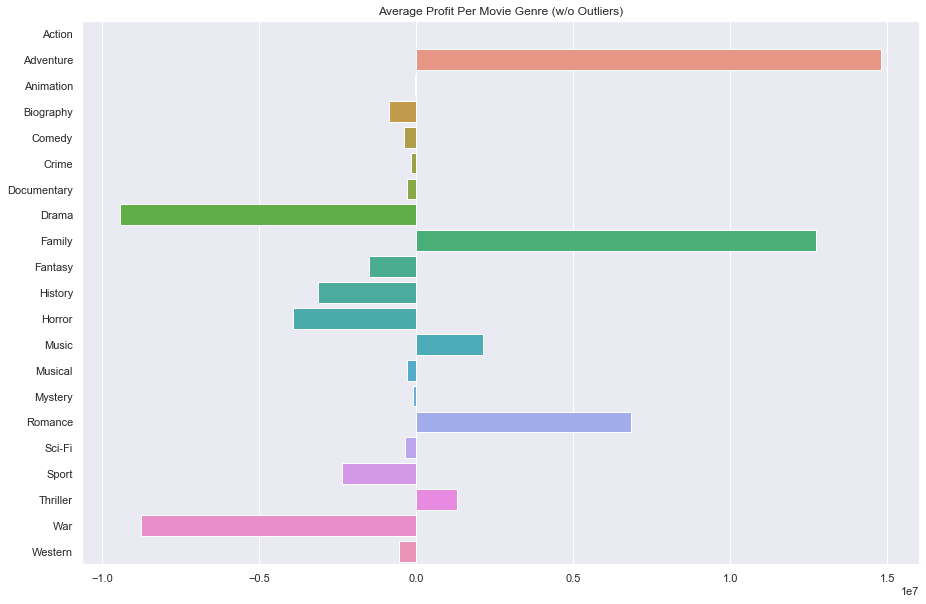

In [32]:
sns_plot2 = sns.barplot(x=avg_profit_per_genre_no_outliers, y=l_o_genres).set_title('Average Profit Per Movie Genre (w/o Outliers)')

In [47]:
q1 = df['Roi'].quantile(0.25)
q3 = df['Roi'].quantile(0.75)
print(q1)
print(q3)

-92.73288166666667
119.93336079545455


In [48]:
iqr = q3 - q1
outlier = iqr * 1.5
print(iqr)
print(outlier)

212.6662424621212
318.9993636931818


In [49]:
lower_bound = q1 - outlier
upper_bound = q3 + outlier
print(lower_bound)
print(upper_bound)

-411.7322453598485
438.9327244886364


In [82]:
roi_df = df.loc[(df['Roi'] > lower_bound) & (df['Roi'] < upper_bound)]

In [83]:
avg_roi_per_genre = [roi_df['Roi'].iloc[num].mean() for num in list(range(-22,-1))]

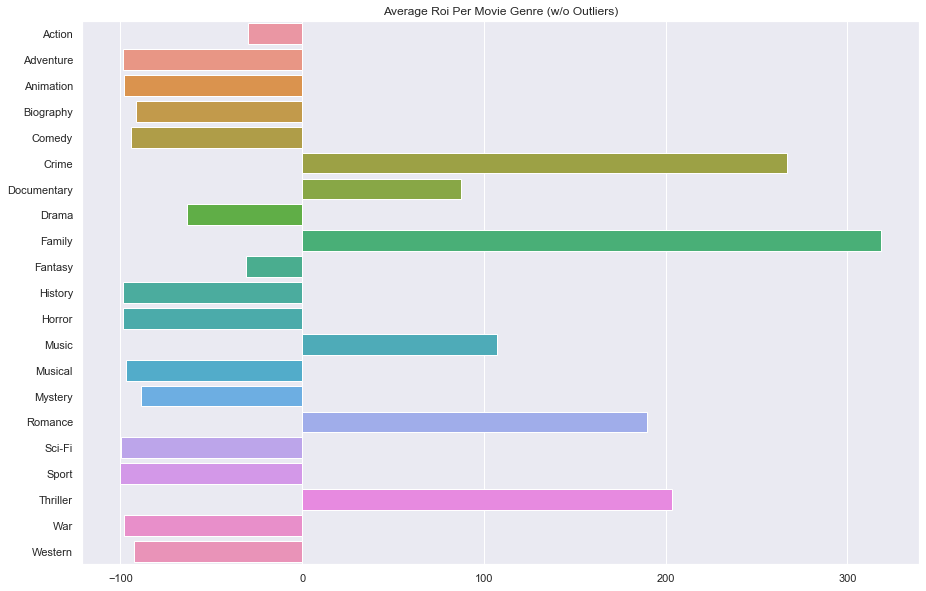

In [86]:
sns_plot3 = sns.barplot(x=avg_roi_per_genre, y=l_o_genres).set_title('Average Roi Per Movie Genre (w/o Outliers)')
fig = sns_plot3.get_figure()
fig.savefig("Average Roi Per Movie Genre.png")

In [39]:
df['Budget']

0        150000000
1        250000000
2        200000000
5         52000000
6        125000000
           ...    
17149     15000000
17157       643500
17160      8940000
17167       600000
17169      2025000
Name: Budget, Length: 5397, dtype: int64

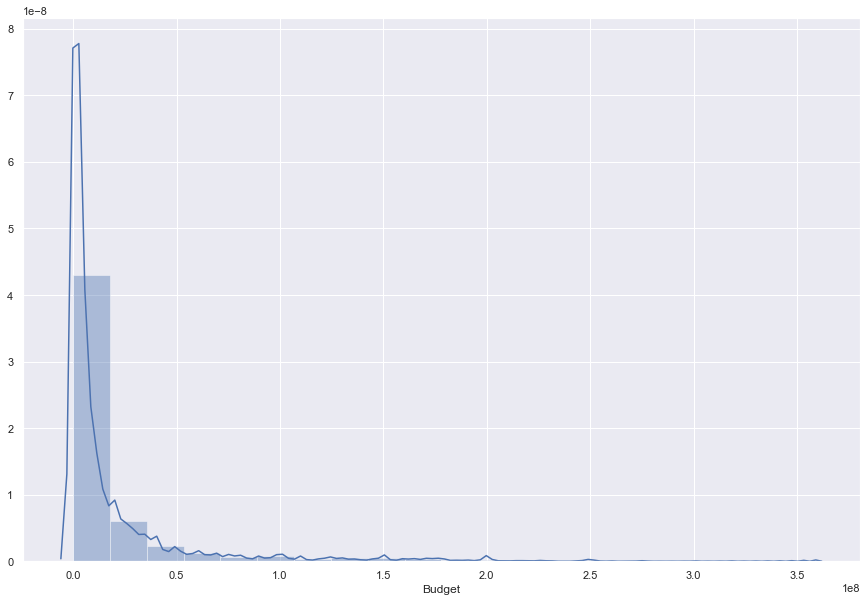

In [40]:
sns.distplot(df['Budget'], bins=20)